In [87]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from scipy.stats import entropy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import socket, struct

import imblearn
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from imblearn.under_sampling import NearMiss
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.utils import class_weight
import tensorflow as tf
import tensorflow_probability as tfp
import numpy as np
from scipy.spatial.distance import jensenshannon
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder



In [88]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [89]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [90]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.distributions import Normal
import numpy as np


In [91]:
filepath = "/content/drive/MyDrive/Colab Notebooks/1st.csv"
df = pd.read_csv(filepath, header=None)

In [92]:
columns = [
    'duration', 'min_fiat', 'min_biat', 'max_fiat', 'max_biat', 'mean_fiat', 'mean_biat',
    'std_fiat', 'std_biat', 'flowPktsPerSecond', 'flowBytesPerSecond', 'min_flowiat',
    'max_flowiat', 'mean_flowiat', 'std_flowiat', 'min_active', 'mean_active', 'max_active',
    'std_active', 'min_idle', 'mean_idle', 'max_idle', 'std_idle', 'class1'
]
df.columns = columns

# Inspect the data
df.head()

,duration,min_fiat,min_biat,max_fiat,max_biat,mean_fiat,mean_biat,std_fiat,std_biat,flowPktsPerSecond,...,std_flowiat,min_active,mean_active,max_active,std_active,min_idle,mean_idle,max_idle,std_idle,class1
0,76,-1,-1,-1,-1,0.0,0.0,0.0,0.0,26315.789474,...,0.0,-1,0.0,-1,0.0,-1,0.0,-1,0.0,CHAT
1,54,-1,-1,-1,-1,0.0,0.0,0.0,0.0,37037.037037,...,0.0,-1,0.0,-1,0.0,-1,0.0,-1,0.0,CHAT
2,67,-1,-1,-1,-1,0.0,0.0,0.0,0.0,29850.746269,...,0.0,-1,0.0,-1,0.0,-1,0.0,-1,0.0,CHAT
3,75,-1,-1,-1,-1,0.0,0.0,0.0,0.0,26666.666667,...,0.0,-1,0.0,-1,0.0,-1,0.0,-1,0.0,CHAT
4,14512571,14512571,-1,14512571,-1,14500000.0,0.0,0.0,0.0,0.206717,...,10300000.0,14512571,14500000.0,14512571,0.0,14512502,14500000.0,14512502,0.0,CHAT


In [93]:
X = df[df.columns[:-1]]
y = df['class1']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encode the labels
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2)


In [94]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(12412, 23)
(3103, 23)
(12412,)
(3103,)


Random Forest Accuracy: 0.87
Confusion Matrix:
[[942  19   8   2   1   4   5]
 [ 68 180   8  16  17   0   5]
 [ 40  17 350  25  36   3   6]
 [  3   8  13 211   8   3   0]
 [  7   9   7   2 302   4   7]
 [  9   1   2   0  12  61   0]
 [ 15   4   6   0  12   0 645]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       981
           1       0.76      0.61      0.68       294
           2       0.89      0.73      0.80       477
           3       0.82      0.86      0.84       246
           4       0.78      0.89      0.83       338
           5       0.81      0.72      0.76        85
           6       0.97      0.95      0.96       682

    accuracy                           0.87      3103
   macro avg       0.84      0.82      0.83      3103
weighted avg       0.87      0.87      0.86      3103



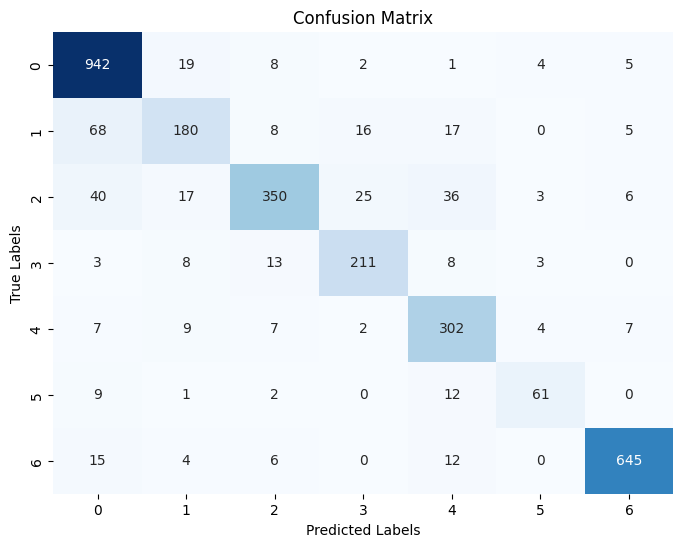

In [95]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

# Evaluate the RandomForest model
y_pred = rf_clf.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print accuracy and confusion matrix
print(f'Random Forest Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [96]:

class BayesianLinear(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        self.in_features = in_features
        self.out_features = out_features

        # Weight parameters
        self.weight_mu = nn.Parameter(torch.Tensor(out_features, in_features).uniform_(-0.2, 0.2))
        self.weight_rho = nn.Parameter(torch.Tensor(out_features, in_features).uniform_(-5, -4))

        # Bias parameters
        self.bias_mu = nn.Parameter(torch.Tensor(out_features).uniform_(-0.2, 0.2))
        self.bias_rho = nn.Parameter(torch.Tensor(out_features).uniform_(-5, -4))

    def forward(self, input):
        weight_sigma = torch.log1p(torch.exp(self.weight_rho))
        bias_sigma = torch.log1p(torch.exp(self.bias_rho))

        weight = Normal(self.weight_mu, weight_sigma).rsample()
        bias = Normal(self.bias_mu, bias_sigma).rsample()

        return F.linear(input, weight, bias)

class BayesianMLP(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super().__init__()
        self.hidden1 = BayesianLinear(input_size, hidden_size)
        self.hidden2 = BayesianLinear(hidden_size, hidden_size)
        self.out = BayesianLinear(hidden_size, num_classes)

    def forward(self, x):
        x = F.relu(self.hidden1(x))
        x = F.relu(self.hidden2(x))
        return self.out(x)

In [97]:
X_train_tensor = torch.FloatTensor(X_train)
X_test_tensor = torch.FloatTensor(X_test)
y_train_tensor = torch.LongTensor(y_train)
y_test_tensor = torch.LongTensor(y_test)

# Define constants
input_size = 23
hidden_size = 128  # Increased hidden size
num_classes = len(torch.unique(y_train_tensor))

In [98]:
model = BayesianMLP(input_size, hidden_size, num_classes)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

num_epochs = 100
batch_size = 64

for epoch in range(num_epochs):
    for i in range(0, len(X_train_tensor), batch_size):
        batch_X = X_train_tensor[i:i+batch_size]
        batch_y = y_train_tensor[i:i+batch_size]

        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model

Epoch [10/100], Loss: 0.9688
Epoch [20/100], Loss: 0.9331
Epoch [30/100], Loss: 0.8964
Epoch [40/100], Loss: 0.8351
Epoch [50/100], Loss: 0.7874
Epoch [60/100], Loss: 0.7833
Epoch [70/100], Loss: 0.7624
Epoch [80/100], Loss: 0.8215
Epoch [90/100], Loss: 0.7663
Epoch [100/100], Loss: 0.7654


In [99]:
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    outputs = model(X_test_tensor)
    _, predicted = torch.max(outputs.data, 1)
    total += y_test_tensor.size(0)
    correct += (predicted == y_test_tensor).sum().item()
    print(f'Accuracy on the test set: {100 * correct / total:.2f}%')

Accuracy on the test set: 70.64%


In [100]:
newval=X_test_tensor[0]

In [101]:
newval_out=y_test_tensor[0]

In [102]:
model.eval()

# Select the input value you want to predict
newval = X_test_tensor[0].unsqueeze(0)  # Add a batch dimension

# Predict the output
with torch.no_grad():
    output = model(newval)
    prediction = F.softmax(output, dim=1)
    predicted_class = torch.argmax(prediction).item()

# Print the prediction and predicted class
print(f"Output probabilities: {prediction}")
print(f"Predicted class: {predicted_class}")

Output probabilities: tensor([[4.6426e-01, 4.6218e-01, 6.6151e-02, 1.1285e-03, 2.3246e-05, 1.6274e-03,
         4.6331e-03]])
Predicted class: 0


In [103]:
model.eval()

# Select the input value you want to predict
newval = X_test_tensor[0].unsqueeze(0)  # Add a batch dimension

# Predict the output
with torch.no_grad():
    output = model(newval)
    prediction = F.softmax(output, dim=1)
    predicted_class = torch.argmax(prediction).item()

# Print the prediction and predicted class
print(f"Output probabilities: {prediction}")
print(f"Predicted class: {predicted_class}")

Output probabilities: tensor([[6.0120e-01, 3.2611e-01, 6.4947e-02, 8.9836e-04, 1.8971e-05, 2.0793e-03,
         4.7551e-03]])
Predicted class: 0


In [104]:
def instability_check(model, x, num_samples=2, threshold=0.1):
    model.eval()
    outputs = []

    for _ in range(num_samples):
        with torch.no_grad():
            outputs.append(F.softmax(model(x), dim=1))

    outputs = torch.stack(outputs)
    mean_output = outputs.mean(dim=0)

    js_divergence = 0.5 * F.kl_div(outputs[0].log(), mean_output, reduction='batchmean') + \
                    0.5 * F.kl_div(outputs[1].log(), mean_output, reduction='batchmean')

    instability = torch.sqrt(js_divergence)

    return instability.item() > threshold

In [105]:
def familiarity_based_filtering(model, X, lambda_factor=1.0, beta_2=0.5):
    model.eval()
    familiarities = []

    for x in X:
        x = x.unsqueeze(0)

        # Compute confidence
        with torch.no_grad():
            output = model(x)
        confidence = F.softmax(output, dim=1).max().item()

        # Compute instability
        instability = instability_check(model, x, num_samples=2, threshold=1.0)  # We want the actual value, not boolean

        # Compute familiarity
        familiarity = (lambda_factor * (confidence - beta_2) - instability) / np.sqrt(lambda_factor**2 + 1)
        familiarities.append(familiarity)

    familiarities = np.array(familiarities)

    # Filter packets with negative familiarity scores
    unknown_indices = np.where(familiarities < 0)[0]

    return unknown_indices, familiarities

In [106]:
def update_model(model, X_new, y_new, num_epochs=10, lr=0.001):
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss()

    model.train()
    for epoch in range(num_epochs):
        optimizer.zero_grad()
        output = model(X_new)
        loss = criterion(output, y_new)
        loss.backward()
        optimizer.step()

        if (epoch + 1) % 5 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

    return model

In [107]:
unknown_indices, familiarities = familiarity_based_filtering(model, X_train_tensor)
if len(unknown_indices) > 0:
    X_new = X_train_tensor[unknown_indices]
    y_new = y_train_tensor[unknown_indices]

    # Update X_train and y_train
    X_train = torch.cat([X_train_tensor, X_new], dim=0).numpy()
    y_train = torch.cat([y_train_tensor, y_new], dim=0).numpy()

    # Re-create tensors for updated X_train and y_train
    X_train_tensor = torch.FloatTensor(X_train)
    y_train_tensor = torch.LongTensor(y_train)

    # Update and re-train model
    model = BayesianMLP(input_size, hidden_size, num_classes)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    criterion = nn.CrossEntropyLoss()

    for epoch in range(num_epochs):
        for i in range(0, len(X_train_tensor), batch_size):
            batch_X = X_train_tensor[i:i+batch_size]
            batch_y = y_train_tensor[i:i+batch_size]

            optimizer.zero_grad()
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()

        if (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Re-evaluate Bayesian model after update
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    outputs = model(X_test_tensor)
    _, predicted = torch.max(outputs.data, 1)
    total += y_test_tensor.size(0)
    correct += (predicted == y_test_tensor).sum().item()
    # print(f'Updated Bayesian Model Accuracy: {100 * correct / total:.2f}%')

Epoch [10/100], Loss: 1.7599
Epoch [20/100], Loss: 1.5844
Epoch [30/100], Loss: 1.5575
Epoch [40/100], Loss: 1.5319
Epoch [50/100], Loss: 1.5008
Epoch [60/100], Loss: 1.4404
Epoch [70/100], Loss: 1.4276
Epoch [80/100], Loss: 1.3720
Epoch [90/100], Loss: 1.4663
Epoch [100/100], Loss: 1.3578


In [108]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

# Evaluate the RandomForest model
y_pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Random Forest Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Random Forest Accuracy: 0.87
Confusion Matrix:
[[941  20   7   1   2   5   5]
 [ 62 183   8  17  19   0   5]
 [ 37  18 361  21  35   1   4]
 [  3   7  13 212   8   3   0]
 [  7   8   7   1 304   4   7]
 [  8   1   3   0  11  62   0]
 [ 14   3   5   0  12   0 648]]


Random Forest Accuracy: 0.87
Confusion Matrix:
[[941  20   7   1   2   5   5]
 [ 62 183   8  17  19   0   5]
 [ 37  18 361  21  35   1   4]
 [  3   7  13 212   8   3   0]
 [  7   8   7   1 304   4   7]
 [  8   1   3   0  11  62   0]
 [ 14   3   5   0  12   0 648]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       981
           1       0.76      0.62      0.69       294
           2       0.89      0.76      0.82       477
           3       0.84      0.86      0.85       246
           4       0.78      0.90      0.83       338
           5       0.83      0.73      0.77        85
           6       0.97      0.95      0.96       682

    accuracy                           0.87      3103
   macro avg       0.85      0.83      0.83      3103
weighted avg       0.87      0.87      0.87      3103



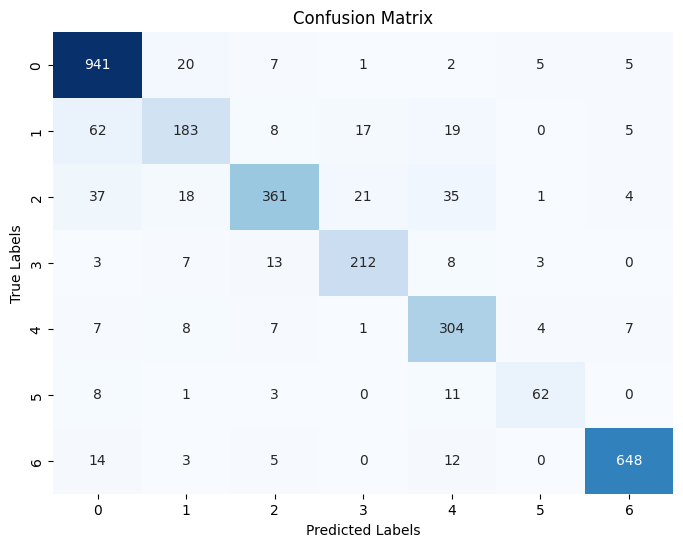

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Assuming rf_clf, X_test, and y_test are already defined and trained

# Make predictions
y_pred = rf_clf.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print accuracy and confusion matrix
print(f'Random Forest Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [112]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.distributions import Normal
import matplotlib.pyplot as plt
import seaborn as sns

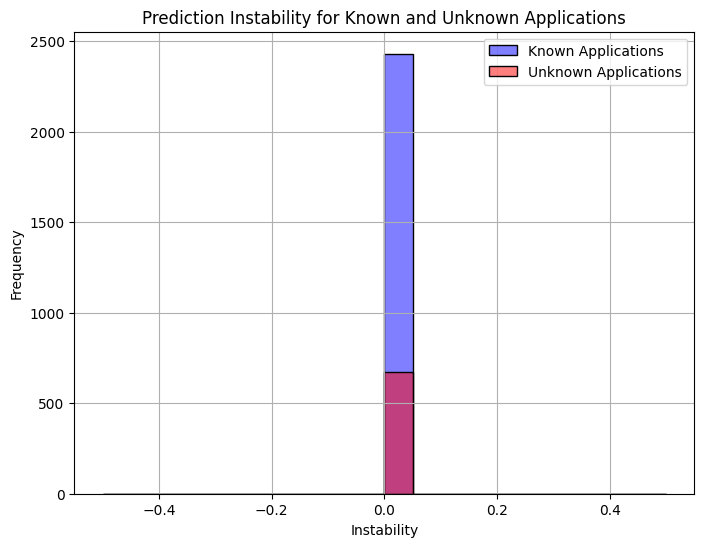

In [115]:
def compute_instability_confidence(model, x):
    model.eval()
    with torch.no_grad():
        output = model(x.unsqueeze(0))  # Assuming x is a single sample
        confidence = F.softmax(output, dim=1).max().item()
        instability = instability_check(model, x.unsqueeze(0))  # Assuming your instability_check function returns a value
    return instability, confidence

# Compute familiarity scores for test samples
unknown_indices, familiarities = familiarity_based_filtering(model, X_test_tensor)

# Compute instabilities for all test samples
instabilities = []
for i in range(len(X_test_tensor)):
    x = X_test_tensor[i]
    instability = compute_instability_confidence(model, x.unsqueeze(0))[0]
    instabilities.append(instability)

# Separate known and unknown instabilities based on familiarity
known_instabilities = [instabilities[i] for i in range(len(instabilities)) if i not in unknown_indices]
unknown_instabilities = [instabilities[i] for i in unknown_indices]

# Plotting Prediction Instability for Known and Unknown Applications
plt.figure(figsize=(8, 6))
sns.histplot(known_instabilities, bins=20, kde=True, color='blue', label='Known Applications')
sns.histplot(unknown_instabilities, bins=20, kde=True, color='red', label='Unknown Applications')
plt.title('Prediction Instability for Known and Unknown Applications')
plt.xlabel('Instability')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

In [119]:
import seaborn as sns
from sklearn.metrics import classification_report


              precision    recall  f1-score   support

           0       0.88      0.96      0.92       981
           1       0.76      0.62      0.69       294
           2       0.89      0.76      0.82       477
           3       0.84      0.86      0.85       246
           4       0.78      0.90      0.83       338
           5       0.83      0.73      0.77        85
           6       0.97      0.95      0.96       682

    accuracy                           0.87      3103
   macro avg       0.85      0.83      0.83      3103
weighted avg       0.87      0.87      0.87      3103



In [123]:
from sklearn.metrics import precision_recall_fscore_support

precision_macro, recall_macro, f1_macro, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')

# Micro-averaged metrics
precision_micro, recall_micro, f1_micro, _ = precision_recall_fscore_support(y_test, y_pred, average='micro')

print('Macro-Averaged Metrics:')
print(f'Precision: {precision_macro:.2f}, Recall: {recall_macro:.2f}, F1-score: {f1_macro:.2f}')

print('Micro-Averaged Metrics:')
print(f'Precision: {precision_micro:.2f}, Recall: {recall_micro:.2f}, F1-score: {f1_micro:.2f}')

Macro-Averaged Metrics:
Precision: 0.85, Recall: 0.83, F1-score: 0.83
Micro-Averaged Metrics:
Precision: 0.87, Recall: 0.87, F1-score: 0.87


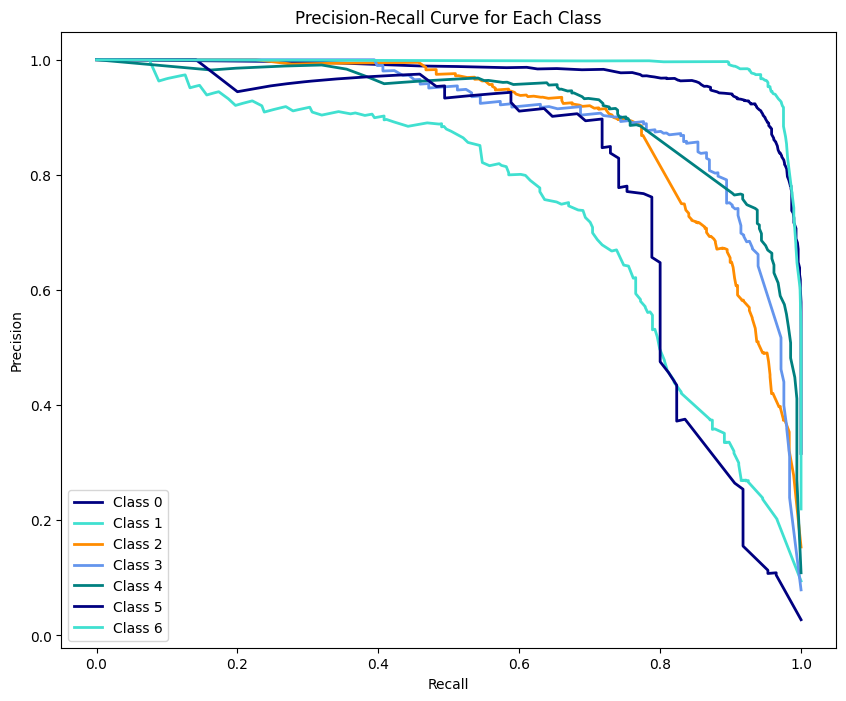

In [125]:
from itertools import cycle
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import label_binarize

# Binarize the labels
y_bin = label_binarize(y_test, classes=np.unique(y_test))

# Compute precision-recall curve for each class
precision = dict()
recall = dict()
for i in range(len(np.unique(y_test))):
    precision[i], recall[i], _ = precision_recall_curve(y_bin[:, i], rf_clf.predict_proba(X_test)[:, i])

# Plot precision-recall curve for each class
plt.figure(figsize=(10, 8))
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])
for i, color in zip(range(len(np.unique(y_test))), colors):
    plt.plot(recall[i], precision[i], color=color, lw=2, label=f'Class {i}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Each Class')
plt.legend(loc='best')
plt.show()

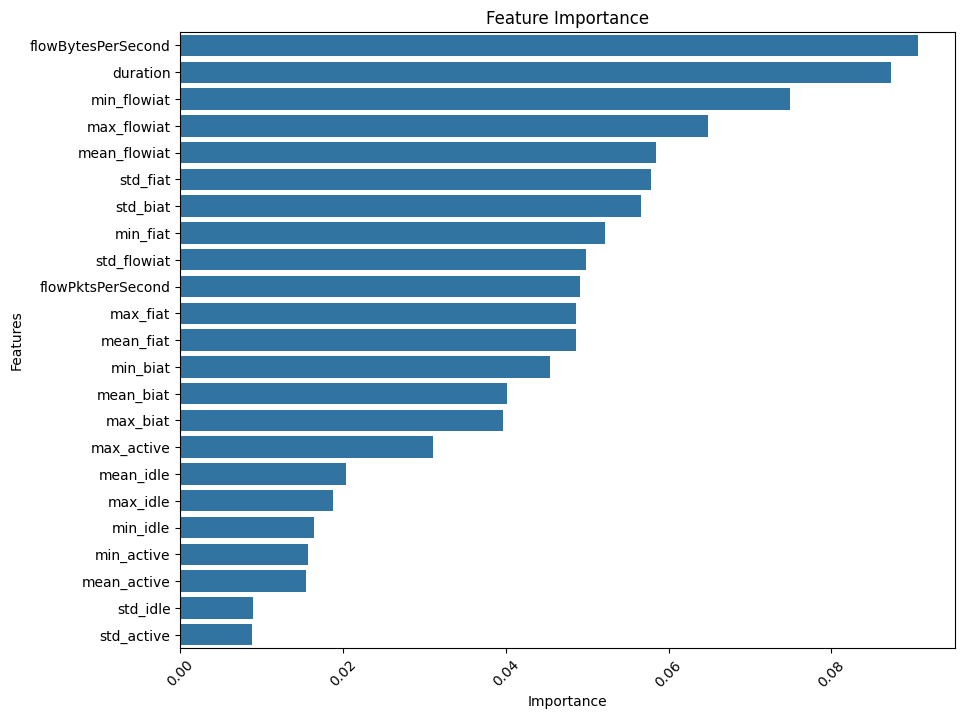

In [126]:
# Assuming rf_clf is your trained Random Forest Classifier
feature_importances = rf_clf.feature_importances_
feature_names = X.columns

# Sort feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x=feature_importances[indices], y=feature_names[indices])
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.xticks(rotation=45)
plt.show()